In [1]:
#Imports for visualization
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [2]:
#Get providers from our account
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')

In [3]:
#Quantum circuit based on a Bell state
bell =  QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

#Quantum circuit of measurement
meas = QuantumCircuit(2, 2)
meas.measure([0, 1], [0, 1])

#Merging both circuits
backend = BasicAer.get_backend('qasm_simulator')
circ = bell + meas
result = execute(circ, backend, shots=1024).result()
counts = result.get_counts(circ)
counts

{'00': 518, '11': 506}

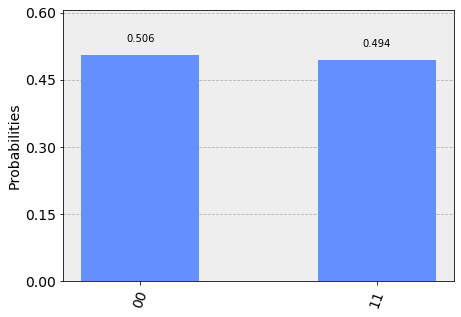

In [4]:
plot_histogram(counts)

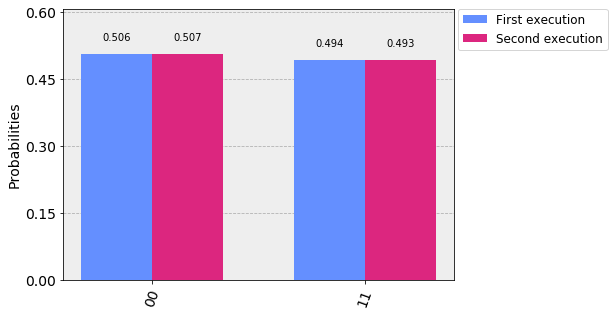

In [5]:
#Execute again
result2 = execute(circ, backend, shots=1024).result()
counts2 = result2.get_counts(circ)
#Ploting with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, counts2], legend=legend)

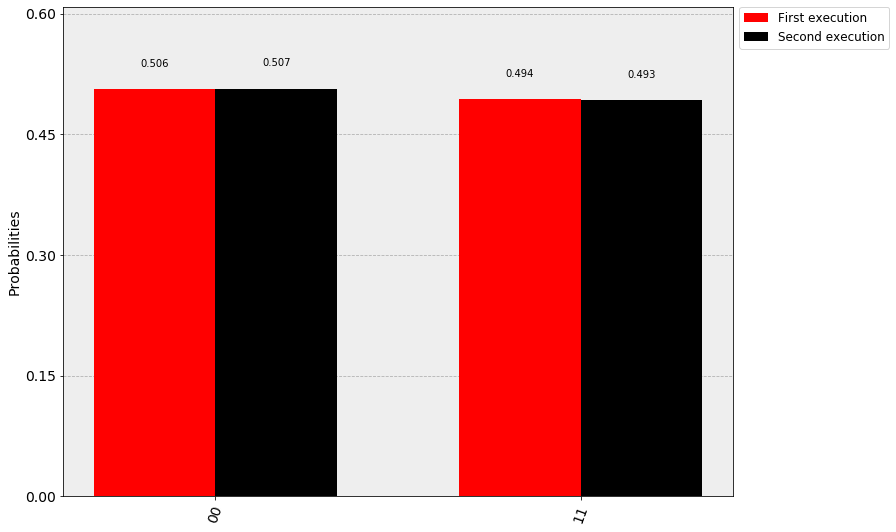

In [6]:
#Another style of ploting
plot_histogram([counts, counts2],       
               legend=legend,           
               sort='asc',             #Descending order like 11 to 00 or 00 to 11
               figsize=(12,9),         #Size of the plot bars  
               color=['red', 'black'], #Color of the bars
               bar_labels=True)        #Set the amplitude of each probability 

In [7]:
#This circuit encode a qubit state into a bit-string
qc = QuantumCircuit(5, 4)
qc.x(4)
for idx in range(5):
    qc.h(idx)
qc.barrier()
qc.cx(0, 4)
qc.cx(1, 4)
qc.cx(3, 4)
qc.barrier()
for idx in range(4):
    qc.h(idx)
qc.measure([0,1,2,3], [0,1,2,3])
qc.draw()

In [8]:
IBMQ.get_provider(group='open').backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

Job Status: job has successfully run


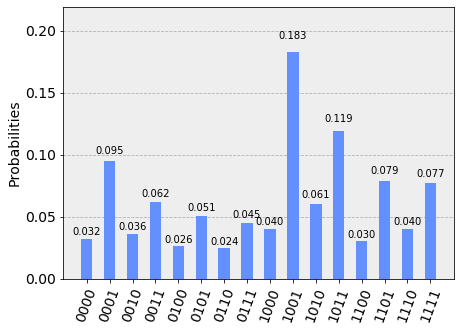

In [9]:
backend = provider.get_backend('ibmq_16_melbourne')
exp_job = execute(qc, backend)
job_monitor(exp_job)
exp_counts = exp_job.result().get_counts()
plot_histogram(exp_counts)

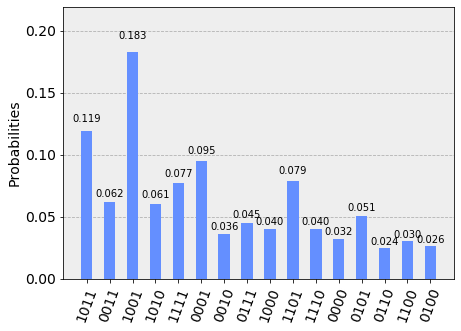

In [10]:
#Plot the hamming distance to 1011
plot_histogram(exp_counts, sort='hamming', target_string='1011')

In [11]:
#We can plot an interactive visualization of the histogram by using a external connectivity to a JS library
#The prefix i is for an interactive ploting
from qiskit.visualization import iplot_histogram
iplot_histogram(counts)

In [12]:
#Diferents types of visualizations in a plot state
backend = BasicAer.get_backend('statevector_simulator')
result = execute(bell, backend).result()
psi = result.get_statevector(bell)
psi

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

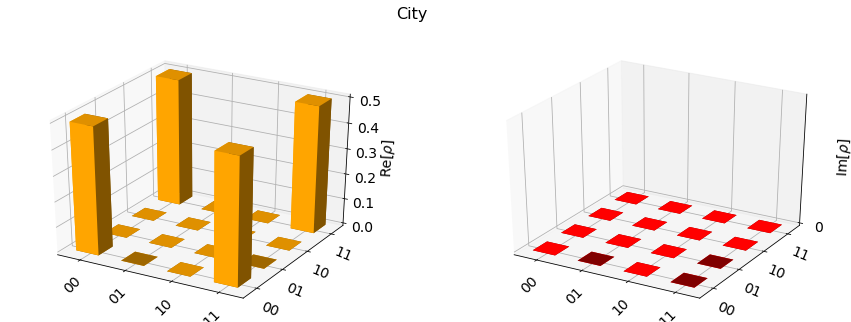

In [13]:
from qiskit.visualization import plot_state_city
plot_state_city(psi, title='City', color=['orange', 'red'])

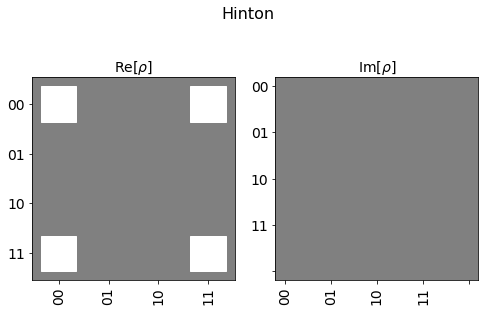

In [14]:
from qiskit.visualization import plot_state_hinton
plot_state_hinton(psi, title='Hinton')

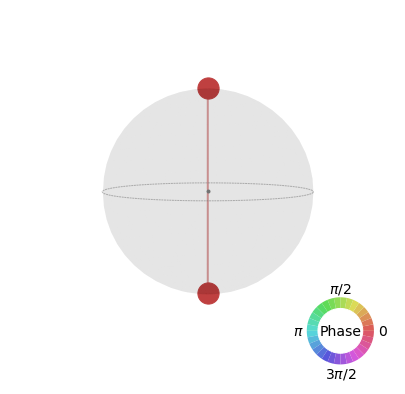

In [15]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(psi)

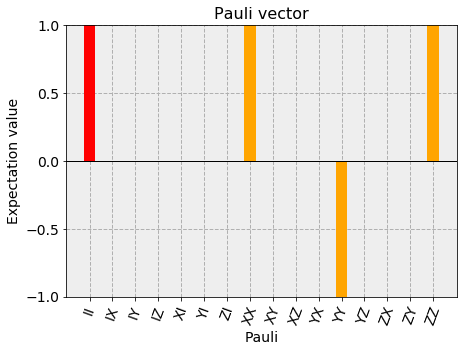

In [16]:
from qiskit.visualization import plot_state_paulivec
plot_state_paulivec(psi, title='Pauli vector', color=['red', 'orange'])

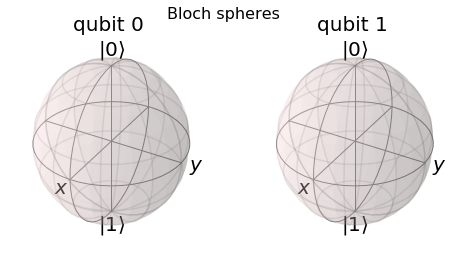

In [17]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(psi, title='Bloch spheres')

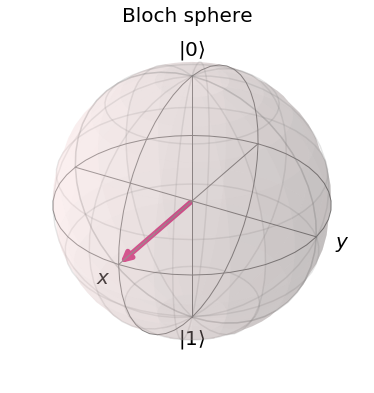

In [18]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1, 0, 0], title='Bloch sphere')

In [19]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright